<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 

Author: [Yury Kashnitsky](https://yorko.github.io). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

# <center> Topic 1. Exploratory data analysis with Pandas
## <center>Practice. Analyzing "Titanic" passengers

**Fill in the missing code ("You code here") and choose answers in a [web-form](https://docs.google.com/forms/d/16EfhpDGPrREry0gfDQdRPjoiQX9IumaL2mPR0rcj19k/edit).**

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'
pd.set_option("display.precision", 2)

**Read data into a Pandas DataFrame**

In [5]:
data = pd.read_csv('titanic_train.csv',index_col='PassengerId')

**First 5 rows**

In [6]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


In [7]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,714.00,891.00,891.00,891.00
mean,0.38,2.31,29.70,0.52,0.38,32.20
std,0.49,0.84,14.53,1.10,0.81,49.69
min,0.00,1.00,0.42,0.00,0.00,0.00
25%,0.00,2.00,20.12,0.00,0.00,7.91
50%,0.00,3.00,28.00,0.00,0.00,14.45
75%,1.00,3.00,38.00,1.00,0.00,31.00
max,1.00,3.00,80.00,8.00,6.00,512.33


**Let's select those passengers who embarked in Cherbourg (Embarked=C) and paid > 200 pounds for their ticker (fare > 200).**

Make sure you understand how actually this construction works.

In [9]:
data[(data['Embarked'] == 'C') & (data.Fare > 200)].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.52,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.33,NaN,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.52,B58 B60,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.38,B57 B59 B63 B66,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.50,C82,C


**We can sort these people by Fare in descending order.**

In [10]:
data[(data['Embarked'] == 'C') & 
     (data['Fare'] > 200)].sort_values(by='Fare',
                               ascending=False).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.33,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.33,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.33,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.38,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.38,B57 B59 B63 B66,C


**Let's create a new feature.**

In [8]:
def age_category(age):
    '''
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    '''
    if age < 30:
        return 1
    elif age < 55:
        return 2
    elif age >= 55:
        return 3

In [8]:
age_categories = [age_category(age) for age in data.Age]
data['Age_category'] = age_categories

**Another way is to do it with `apply`.**

In [11]:
data['Age_category'] = data['Age'].apply(age_category)

**1. How many men/women were there onboard?**
- 412 men and 479 women
- 314 men and 577 women
- 479 men and 412 women
- 577 men and 314 women

In [48]:
# You code here
df_agrupado = data.groupby('Sex').count()
df_agrupado ['Survived']

Sex
female    314
male      577
Name: Survived, dtype: int64

**2. Print the distribution of the `Pclass` feature. Then the same, but for men and women separately. How many men from second class were there onboard?**
- 104
- 108
- 112
- 125

There were 108 men in second class


<AxesSubplot:xlabel='Pclass'>

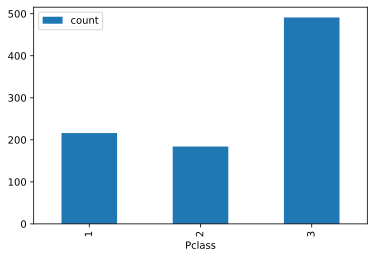

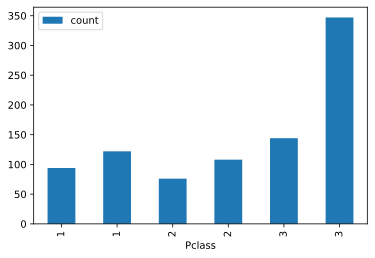

In [185]:
# You code here
df_per_pclass = data.groupby(['Pclass']).size().reset_index(name='count')
df_per_pclass_sex = data.groupby(['Pclass','Sex']).size().reset_index(name='count')
num_class2_male = df_per_pclass_sex["count"][(df_per_pclass_sex["Sex"]=="male") & (df_per_pclass_sex["Pclass"]==2)]
print("There were {0} men in second class".format(int(num_class2_male)))
df_per_pclass.plot(x="Pclass",y="count",kind="bar")
df_per_pclass_sex.plot(x="Pclass",y="count",kind="bar")

**3. What are median and standard deviation of `Fare`?. Round to two decimals.**
- median is  14.45, standard deviation is 49.69
- median is 15.1, standard deviation is 12.15
- median is 13.15, standard deviation is 35.3
- median is  17.43, standard deviation is 39.1

In [73]:
# You code here
print ("median is {0}, standard deviation is {1}".format(round(data["Fare"].median(),2),round(data["Fare"].std(),2)))

median is 14.45, standard deviation is 49.69


**4. Is that true that the mean age of survived people is higher than that of passengers who eventually died?**
- Yes
- No


In [100]:
# You code here
df_survived = data [data["Survived"]==1]
df_died = data [data["Survived"]==0]
print("mean age of survivors: {0}".format(round(df_survived["Age"].mean(),2)))
print("mean age of non-survivors: {0}".format(round(df_died["Age"].mean(),2)))
print ("No, it is not true. The mean age of non-survivors is higher that the one of survivors")

mean age of survivors: 28.34
mean age of non-survivors: 30.63
No, it is not true. The mean age of non-survivors is higher that the one of survivors


**5. Is that true that passengers younger than 30 y.o. survived more frequently than those older than 60 y.o.? What are shares of survived people among young and old people?**
- 22.7% among young and 40.6% among old
- 40.6% among young and 22.7% among old
- 35.3% among young and 27.4% among old
- 27.4% among young and  35.3% among old

In [153]:
# You code here
data ["Age_Group"] = pd.cut(x=data['Age'], bins=[0, 30, 60, 100], labels=["Young", "Middle Aged", "Old"])
df_per_age = data.groupby(['Age_Group', 'Survived']).size().reset_index(name='count')
num_survivors_young = df_per_age["count"][(df_per_age["Age_Group"]=="Young") & (df_per_age["Survived"]==1)]
num_dead_young = df_per_age["count"][(df_per_age["Age_Group"]=="Young") & (df_per_age["Survived"]==0)]
num_survivors_old = df_per_age["count"][(df_per_age["Age_Group"]=="Old") & (df_per_age["Survived"]==1)]
num_dead_old = df_per_age["count"][(df_per_age["Age_Group"]=="Old") & (df_per_age["Survived"]==0)]
resultYoung = float(num_survivors_young)/(float(num_dead_young)+float(num_survivors_young))
print ("% Young Survivors: {0}%".format(round(resultYoung*100,1)))
resultOld = float(num_survivors_old)/(float(num_dead_old)+float(num_survivors_old))
print ("% Old Survivors: {0}%".format(round(resultOld*100,1)))


% Young Survivors: 40.6%
% Old Survivors: 22.7%


**6. Is that true that women survived more frequently than men? What are shares of survived people among men and women?**
- 30.2% among men and 46.2% among women
- 35.7% among men and 74.2% among women
- 21.1% among men and 46.2% among women
- 18.9% among men and 74.2% among women

In [159]:
# You code here
df_per_sex = data.groupby(['Sex', 'Survived']).size().reset_index(name='count')
num_survivors_male = df_per_sex["count"][(df_per_sex["Sex"]=="male") & (df_per_sex["Survived"]==1)]
num_dead_male = df_per_sex["count"][(df_per_sex["Sex"]=="male") & (df_per_sex["Survived"]==0)]
num_survivors_female = df_per_sex["count"][(df_per_sex["Sex"]=="female") & (df_per_sex["Survived"]==1)]
num_dead_female = df_per_sex["count"][(df_per_sex["Sex"]=="female") & (df_per_sex["Survived"]==0)]
resultMale = float(num_survivors_male)/(float(num_dead_male)+float(num_survivors_male))
print ("% Male Survivors: {0}%".format(round(resultMale*100,1)))
resultFemale = float(num_survivors_female)/(float(num_dead_female)+float(num_survivors_female))
print ("% Female Survivors: {0}%".format(round(resultFemale*100,1)))

% Male Survivors: 18.9%
% Female Survivors: 74.2%


**7. What's the most popular first name among male passengers?**
- Charles
- Thomas
- William
- John

In [212]:
# You code here
def getFirstName (Name):
    fn = str(Name).split(".") [1]
    return str(fn)
df_male = data.copy()
df_male = df_male.drop(df_male[df_male['Sex']!='male'].index)
df_male ["First Name"] = df_male["Name"].apply (getFirstName)
df_male_Name = df_male.groupby("First Name").size().reset_index(name='count')
df_male_Name = df_male_Name.sort_values(by='count', ascending=False)
df_male_Name.head(1)


,First Name,count
247,John,9


**8. How is average age for men/women dependent on `Pclass`? Choose all correct statements:**
- On average, men of 1 class are older than 40
- On average, women of 1 class are older than 40
- Men of all classes are on average older than women of the same class
- On average, passengers ofthe first class are older than those of the 2nd class who are older than passengers of the 3rd class

In [234]:
# You code here

df_sex_class = data.copy()
df_sex_class ["Sex_Class"] = df_sex_class ['Sex'] + df_sex_class ['Pclass'].astype(str)
df_sex_class.groupby("Sex_Class").mean()
print ("On average men of 1 class are older than 40 => TRUE (41.28)")
print ("On average women of 1 class are older than 40 => FALSE (34,61)")
print ("Men of all classes are on average older than women of the same class => TRUE")
print ("On average, passengers of the first class are older than those of the 2nd class who are older than passengers of the 3rd class => TRUE")

On average men of 1 class are older than 40 => TRUE (41.28)
On average women of 1 class are older than 40 => FALSE (34,61)
Men of all classes are on average older than women of the same class => TRUE
On average, passengers of the first class are older than those of the 2nd class who are older than passengers of the 3rd class => TRUE
